# <center> <h1>   🎮  🧑‍💻  🏎

# <center> CarRacing haydashni o'rgatamiz. 🏎️🎮

<center> 

# 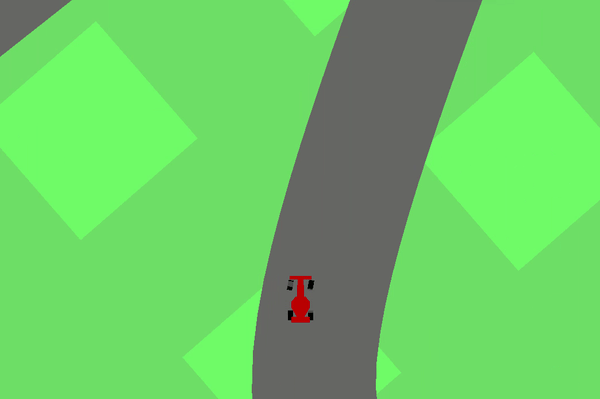

# 

In [1]:
!pip install gym[box2d] pyglet
# gym[box2d] va pyglet ni o'rnatib olamiz

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pygame-2.1.0-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached swig-4.2.0.post0-py2.py3-none-win_amd64.whl.metadata (3.7 kB)
Using cached pygame-2.1.0-cp310-cp310-win_amd64.whl (4.8 MB)
Using cached swig-4.2.0.post0-py2.py3-none-win_amd64.whl (2.5 MB)
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-win_amd64.whl size=433296 sha256=7bf6fb59d17350727e66a9efa93f213a24b941514e89fa10cf341932a7e8f057
  Stored in directory: c:\users\djdle\appdata\local\pip\cache\wheels\db\8f\6a\

In [ ]:
# Sizda gym[box2d] o'rtanitishda muammo bo'lsa siz Swigni yuklab olishingiz kerak
# https://sourceforge.net/projects/swig/files/latest/download  
# Tepadagi link bo'yicha o'tasiz va Swigni yuklab olasiz
# Keyin uni arxivdan chiqarasiz va masalan C:\Program Filesga o'tkazasiz

# SWIG - bu C va C++ tillarida yozilgan dasturlar va kutubxonalarni tarjima qilingan yoki kompilyatsiya qilingan tillar bilan bog'lash 
# uchun bepul vosita. Asosiy maqsad: ba'zi tillarda yozilgan funksiyalarni boshqa tillardagi koddan chaqirish.

<center>

<center> Men C:\Program Files ga o'tkazib oldim(pastdagi rasmga qarang)
    
# 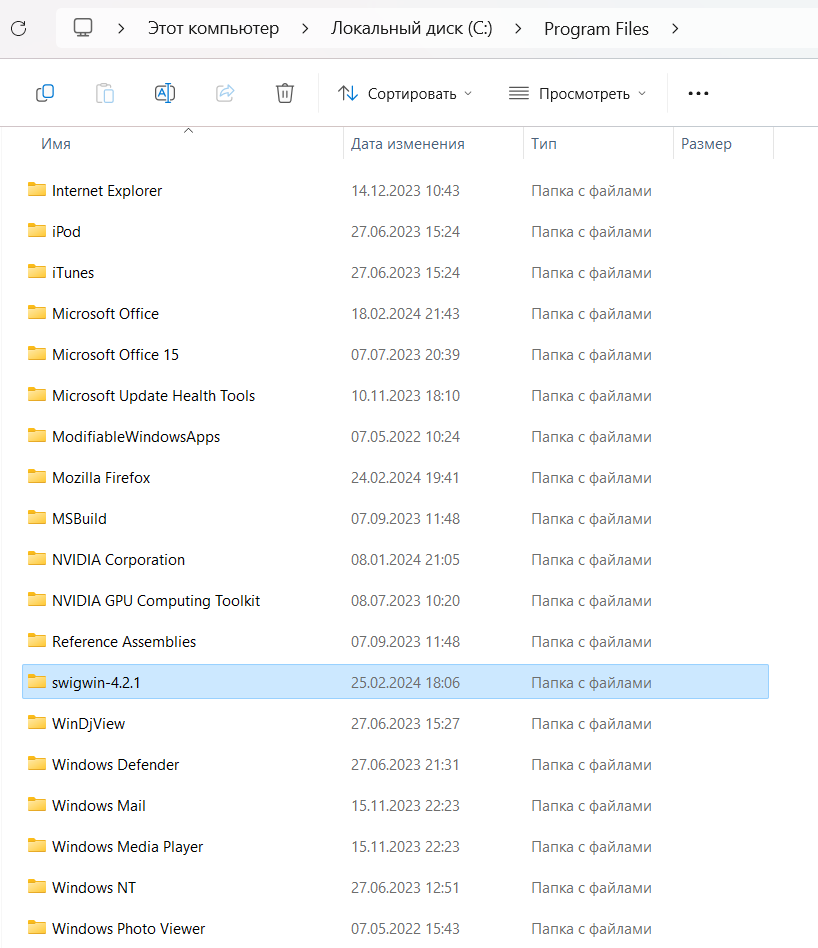

<center> Keyin shu papkagacha bo'lgan yo'lni copy qilib olassiz
<center> masalan
<center> C:\Program Files\swigwin-4.2.1
<center> undan keyin
<center>  Endi мой компьютер -> свойства системы -> переменные среды (pastdagi rasmga qarang)

<center>
    
# 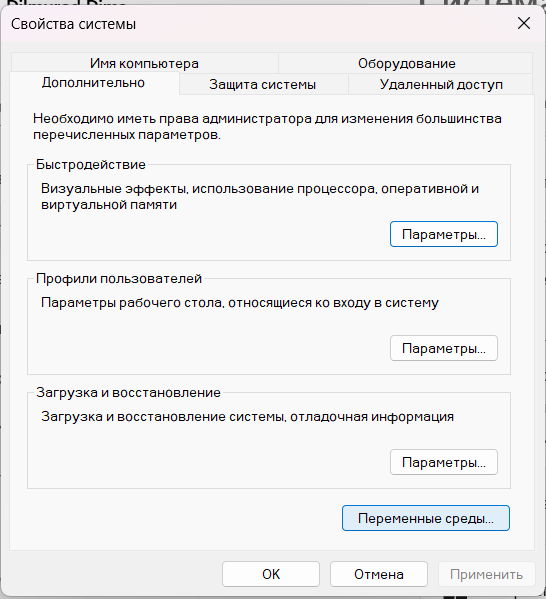


<center> Pathga kiramiz(pastdagi rasmga qarang)

<center>
    
# 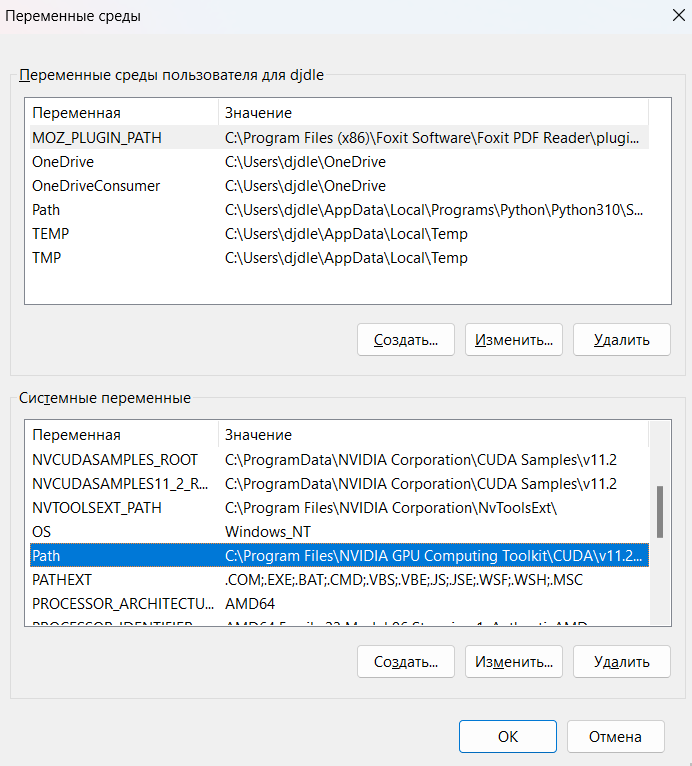

<center> Swig papkasiga bo'lgan yo'lni ko'rsatamiz

<center> 
    
# 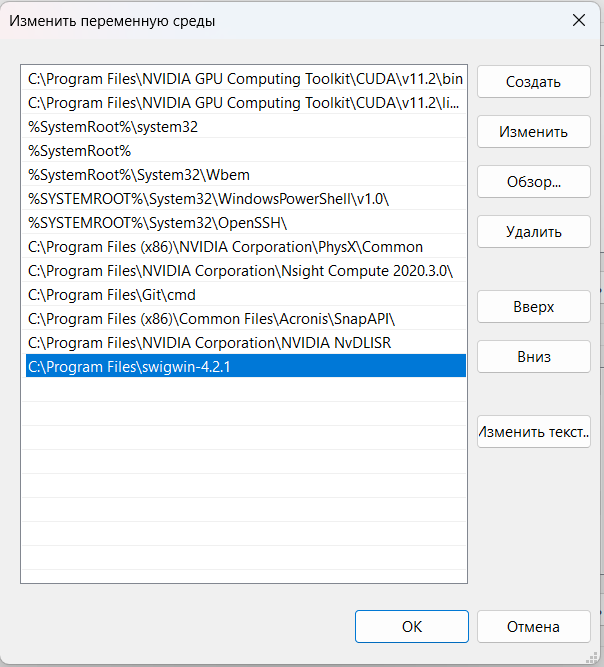

Создать -> Ok -> Ok ->Ok

# 

In [2]:
# Swigi o'rnatib olganingizdan keyin kompyuteringzinni Reset qilib o'chirib yoqsangiz yaxshi bo'ladi
# boshqatdan o'rnatamiz
!pip install gym[box2d] pyglet


In [1]:
import gym # GYM - bu OpenAI tomonida yaratilgan kutubxona bo'lib, u bizga muhit(Environment) yaratish va ularni test qilish uchun kerak bo'ladi.

from stable_baselines3 import PPO # PPO algoritmini chaqirib olamiz. Proximal Policy Optimization.

from stable_baselines3.common.vec_env import DummyVecEnv # DummyVecEnv -  Pythonda har bir muhitni ketma-ket chaqirib, 
# bir nechta muhit uchun oddiy vektorli qobiq hosil qiladi. Bu bizga hisob kitoblarni tezroq amalga oshirish imkonini beradi.
# Oddiyroq aytadigan bo'lsak modelni o'qitish uchun frame(kadrlarni)larni batch qilib beradi.

from stable_baselines3.common.evaluation import evaluate_policy # testlashni osonlashtirish uchun kerak
# biz bu kod orqali n_epizod uchun reawrdni(mukofotni) o'rtachsini olamiz. Aniq bir agent uchun stdni ham olishimiz mumkin

In [2]:
environment_name = "CarRacing-v2"

In [3]:
env = gym.make(environment_name, render_mode="human")

In [4]:
env.reset()
# environmentimiz rasmlardan iborat ekan

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {})

In [5]:
env.observation_space
# 0 state(observation)ning past darajasi(ya'ni pixelimizning eng past qiymati), 255 kuzatishning yuqori darajasi(ya'ni pixelimizning eng baland qiymati)
# (96, 96, 3), 96x96x3 o'lchovli rasmimiz

Box(0, 255, (96, 96, 3), uint8)

In [6]:
env.action_space
# Agar Box qiymat bo'lsa [-1.  0.  0.].  
# 1-qiymat. Burilish (-1 to'liq chapga, +1 to'liq o'ngga), 
# 2-qiymat. Gaz
# 3-qiymat. Tormoz

# Agar Discrete qiymat bo'lsa 5 ta harakat bo'ladi
# 1-qiymat. hech nima qilmaslik
# 2-qiymat. Chapga burilish
# 3-qiymat. O'nnga burilish
# 4-qiymat. Gaz
# 5-qiymat. Tormoz


Box([-1.  0.  0.], 1.0, (3,), float32)

In [7]:
env.render()

True

In [8]:
episodes = 5

for episode in range(1, episodes+1):

    obs = env.reset()
    done = False
    score = 0

    while not done:
        env.render() ## O'yinni ekranga chiqarish
        action = env.action_space.sample() # random harakatlarni olamiz
        obs, reward, done, truncated, info = env.step(action) #  keyingi qadamga o'tamiz
        score+=reward

    print("Episodes:",  episode, ". Score:", score)
env.close()
# Bu o'yinda Reward har bir kadr uchun -0,1 ga teng va bosib o'tilgan yo'l uchun +1000/N,
# bu erda N - yo'limizdagi biz bosgan plitkalarning umumiy soni. 
# Masalan, agar siz o'yinni 732 kadrda tugatgan bo'lsangiz, sizning mukofotingiz 1000 - 0,1*732 = 926,8 ball.

# Barcha plitkalarni bosib o'tganimizdan so'ng epizod tugaydi. Mashina yo'ldan tashqariga ham chiqishi mumkin - ya'ni trassadan uzoqqa, 
# bu holda u -100 mukofot oladi va o'ladi.
     

D:\IT\Python\RL\rl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episodes: 1 . Score: -875.2319148937252
Episodes: 2 . Score: -875.8388349515646
Episodes: 3 . Score: -866.2930693070367
Episodes: 4 . Score: -871.0821917809291
Episodes: 5 . Score: -863.5333333334388


In [9]:
env = gym.make(environment_name, render_mode="human")

In [10]:
state = env.reset()

In [11]:
state.shape
# e'tibor bersaning bizda xatolik chiqadi
# chunki bizning malumotlar faqat hozrcha faqat tuple
# keling endi buni to'g'irlaymmiz

AttributeError: 'tuple' object has no attribute 'shape'

In [12]:
env.close()

In [13]:
env = gym.make(environment_name, render_mode="human")
env = DummyVecEnv([lambda: env])

D:\IT\Python\RL\rl\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [14]:
state = env.reset()

In [15]:
state.shape
# endi e'tibor bersaning o'lchamimiz (1,96,6,3) bo'lib o'zgargan
# 1-batch, 2-rasmimiz(kadr)
# Biz malumotlarimizni modelimizga batch qilib jo'natamiz

(1, 96, 96, 3)

In [16]:
log_path = "Training\Logs"
log_path

'Training\\Logs'

In [17]:
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path)
# PPO algoritmini chaqirib olamiz. Proximal Policy Optimization. Bu bizning asosimiz
# PPO - (Proksimal siyosatni optimallashtirish). O'yinda bizing agent(Bizning Aravacha), atrof-muhit bilan o'zaro aloqada bo'ladi
# (ya'ni o'yinni ichida bo'ladi), va u turli harakatlarni sinab ko'radi va ular uchun mukofot oladi. 
# PPO agentning joriy strategiyasi (harakatlar ketma ketligi) qanchalik yaxshi ekanini tahlil qiladi va samaradorlikni oshirish uchun 
# kichik yaxshilanishlarni taklif qiladi.
# PPO o'qitishni qiyinlashtirmaslik uchun katta bo'lmagan o'zgarishlarni oladi.

# CnnPolicy - Politikani turi. Cnn qanday ishlashini tushunadi. Bu agentning hatti-harakatlari strateiyasini ehitmollilari bilan ishlash uchun kerak.
# Oddiyroq aytadigan bo'lsak CnnPolicy bizga rasmlar bilan ishlash uchun kerak boladi.
# Bizda ham o'yinizmiz rasmlardan iborat.
# CnnPolicy dan boshqa MlpPlociy(bu ko'p darajali perseptron degani) ham bor u bizga  jadvallar bilan ishlayotgan bo'lsak kerak bo'ladi
#  To'liq ma'lumotni https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#ppo-policies  olishingiz mumkin 🙂


Using cuda device
Wrapping the env in a VecTransposeImage.


In [8]:
model.learn(total_timesteps=100000)

Logging to Training\Logs\PPO_3


D:\IT\Python\RL\rl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


-----------------------------
| time/              |      |
|    fps             | 28   |
|    iterations      | 1    |
|    time_elapsed    | 71   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 2           |
|    time_elapsed         | 147         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007296473 |
|    clip_fraction        | 0.073       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.25       |
|    explained_variance   | 0.00329     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.234       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00524    |
|    std                  | 0.997       |
|    value_loss           | 0.728       |
----------------------------------

Biz log larimizni tensorboarda ko'rishimiz mumkin. Birinchi bo'lib tensorboardni ishlatib olamiz

    1-bo'lib yadroni activate qilamiz
    2-qadam. tensorboard --logdir D:\IT\Python\RL\rl\Training\Logs\PPO_3 cmdga yozamiz (logdir dan keyin hamma loglarni saqlab qo'ygan papkasini ko'rsatadi)
    3-qadam. Brauzerda http://localhost:6006/ linkni ochamiz

<center>

# 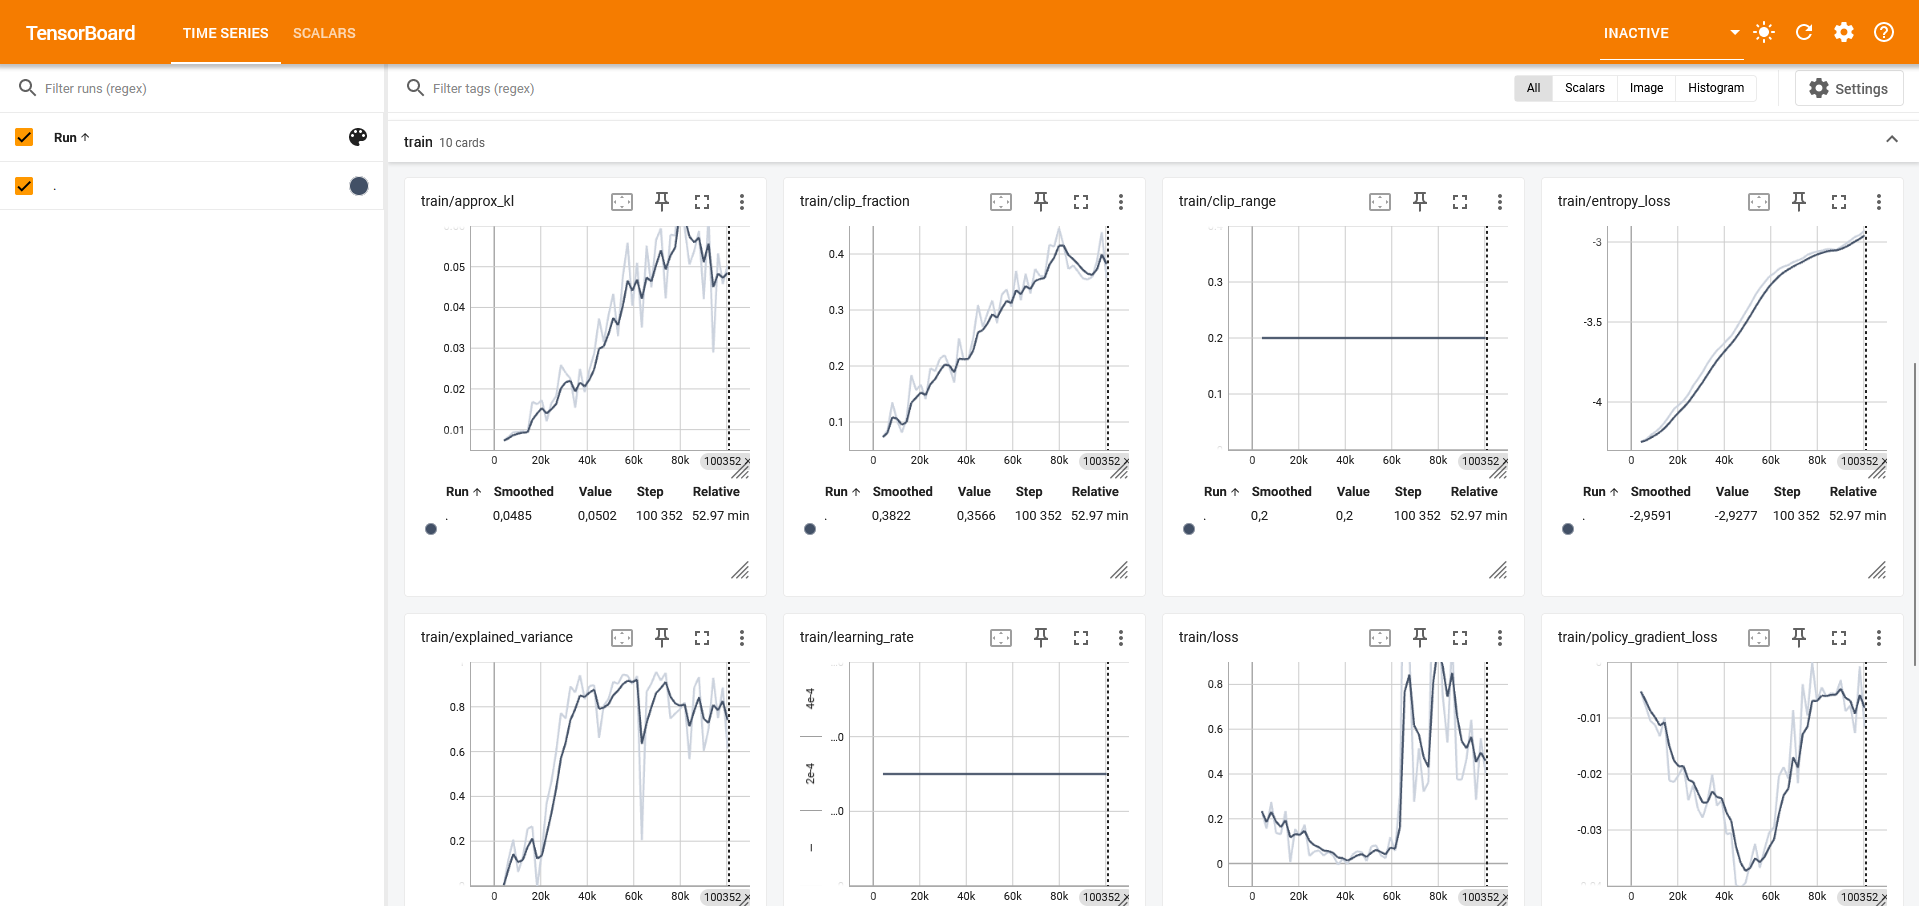

# 

In [9]:
model.save("Training\Saved_Models\PPO_CarRacing_Model")
# modelni saqlab qo'yamiz

In [10]:
del model
# modelni o'chiramiz

In [4]:
env = gym.make(environment_name, render_mode="human")
env = DummyVecEnv([lambda: env])

D:\IT\Python\RL\rl\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [5]:
model = PPO.load("Training\Saved_Models\PPO_CarRacing_Model", env)
# modelni yuklab olamiz

Wrapping the env in a VecTransposeImage.


In [14]:
evaluate_policy(model, env, n_eval_episodes=10, render=True) # Politikamiz/Strategiyamizni test qilib ko'ramiz
# 588.4 bu 10 ta episod uchun o'rtacha rewardi(mukofot), 182.9 bo'lsa uning std si
# Demak biz std 182.9 bo'lganda o'rtacha 588 reward olyapmiz

D:\IT\Python\RL\rl\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(588.4677961491049, 182.9664608105041)

In [6]:
# Demak o'qitgan modelimizni ishlatib ko'ramiz
episodes = 5

for episode in range(1, episodes+1):

    obs = env.reset()
    done = False

    score = 0

    while not done:
        env.render(mode="human")

        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        score+=reward

    print("Episode:{}, Score:{}".format(episode, score))
env.close() 
#  biz o'yinimizda maksimum 900 ochko(reward) olishizmiz mumkin
#  bizda hozir 4-episode da 604 ochko(reward) oldik, yomon emas

D:\IT\Python\RL\rl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode:1, Score:[70.90913]
Episode:2, Score:[306.24637]
Episode:3, Score:[291.30118]
Episode:4, Score:[604.9814]
Episode:5, Score:[336.23813]


In [8]:
env.close()

# <center> <h1>    🧑‍💻  🚀